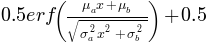

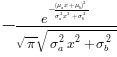

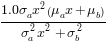

In [186]:
#プロトタイプ
%matplotlib inline
from sympy import *
init_printing()
y,x,ua,ub,sa,sb,x,d = symbols('y,x,mu_a,mu_b,sigma_a,sigma_b,x,d')
f = 0.5 + 0.5 * erf((ua*x+ub)/sqrt(sa*sa*x*x+sb*sb))
p = -exp(-(ua*x+ub)**2/(sa*sa*x*x+sb*sb))/sqrt(pi)/sqrt(sa*sa*x*x+sb*sb)
display(f, p)
display(simplify(diff(f, sa)/p))

array([[ 0.,  0.,  0.,  0.]])

array([[ 0.,  0.,  0.,  0.]])

array([[ 0.,  0.,  0.,  1.]])

array([[ 0.        ,  0.        ,  0.        ,  0.99754187]])

array([[ 0.,  0.,  1.,  0.]])

array([[  0.00000000e+00,   4.30805218e-05,   9.99998551e-01,
          0.00000000e+00]])

array([[ 0.,  1.,  0.,  0.]])

array([[  0.00000000e+00,   9.99999873e-01,   9.21073719e-07,
          2.99641584e-02]])

array([[ 1.,  0.,  0.,  0.]])

array([[ 1.,  0.,  0.,  0.]])

array([[  1.00000000e+000,   3.01467999e-001,   9.16999864e-003,
          5.42362177e-008],
       [  1.00000000e+000,   2.04524906e-005,   4.44659081e-323,
          2.81233883e+000],
       [  1.00000000e+000,   5.35020334e-003,   1.40907911e-006,
          4.14067657e-006],
       [  1.00000000e+000,   8.55257302e-008,   5.19043233e-024,
          2.66909057e-012],
       [  1.00000000e+000,   1.64944108e+000,   2.77654068e-082,
          2.68381115e+000],
       [  1.00000000e+000,   6.22849007e-006,   1.20506509e-015,
          3.36922879e-009],
       [  1.00000000e+000,   8.83104539e-001,   2.23734097e-005,
          1.50475198e-006],
       [  1.00000000e+000,   1.59642693e-003,   2.65072920e+000,
          4.41709757e-152]])

array([[ 0.03783082],
       [ 2.37030957],
       [ 1.95473775],
       [ 1.73385327],
       [ 4.63409514],
       [ 1.74811382],
       [ 2.0005685 ],
       [ 3.63056701]])

array([[  3.04093526e-03,   5.21786364e-02,   5.62291560e-04,
          5.55625129e-01,   2.63622035e+00,   1.81131299e-01,
          2.70746962e+00,   1.20562127e-01],
       [  9.27988316e-08,   6.48624555e-18,   3.15755467e-04,
          1.20693747e-03,   1.94624365e+00,   1.94281364e-03,
          5.09025152e-04,   2.44131385e+00],
       [  1.49974441e-05,   2.06596282e-07,   4.47844649e-02,
          1.58890751e-12,   9.54815484e-05,   2.12376402e-05,
          4.13237766e-02,   4.21688362e+00],
       [  2.16551889e+00,   2.12362248e+01,   1.43343913e-02,
          8.57874970e-03,   1.76714245e+01,   3.89748486e-02,
          1.25664572e-02,   3.43315588e-02]])

array([[  3.51998766e-18],
       [  1.27165160e-28],
       [  3.75684358e-19],
       [  3.49322464e+00]])

/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:96: RuntimeWarning: divide by zero encountered in log


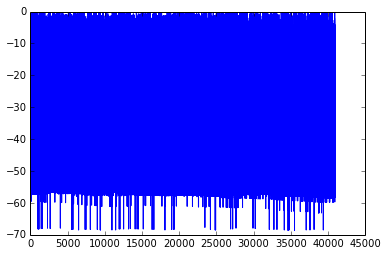

In [467]:
#プロトタイプ 2層
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import *

I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

if False:
    HAu = zeros((8,4))
    HAs = ones(shape(HAu))

    HBu = zeros((8,1))
    HBs = ones(shape(HBu))

    OAu = zeros((4,8))
    OAs = ones(shape(OAu))

    OBu = zeros((4,1))
    OBs = ones(shape(OBu))

eps = 0.05
err = []

epoch = 5 * ( 2 ** 13 )
def delta(J, D, Y):
    E = -J
    row, col = shape(J)
    for r in range(row):
        for c in range(col):
            if 0 < Y[r,c] and Y[r,c] < 1:
                E[r,c] *= D[r,c]/Y[r,c] - (1-D[r,c])/(1-Y[r,c])
            else:
                E[r,c] *= D[r,c] - Y[r,c]
    return E

for k in range(epoch):
    X = I[ k % 5 ]
    Y = O[ k % 5 ]
    
    HX = X
    HA = normal(size=shape(HAu))*HAs+HAu
    HB = normal(size=shape(HBu))*HBs+HBu
    
    HV = dot(HA, HX) + HB
    HVu = dot(HAu,    HX   ) + HBu
    HVv = dot(HAs**2, HX**2) + HBs**2
    HVs = sqrt(HVv)
    
    HF = 0 < HV
    HP = 0.5 + 0.5 * erf(HV/HVs)
    HPu = 0.5 + 0.5 * erf(HVu/HVs)
    
    OX = HF
    OA = normal(size=shape(OAu))*OAs+OAu
    OB = normal(size=shape(OBu))*OBs+OBu
    
    OV = dot(OA, OX) + OB
    OVu = dot(OAu,    OX   ) + OBu
    OVv = dot(OAs**2, OX**2) + OBs**2
    OVs = sqrt(OVv)
    
    OF = 0 < OV
    OP = 0.5 + 0.5 * erf(OV/OVs)
    OPu = 0.5 + 0.5 * erf(OVu/OVs)
    
    OY = Y    
    E = OY - OPu
    
    OJ  = -exp(-(-OV )**2/OVv)/sqrt(pi)/OVs
    OJu = -exp(-(-OVu)**2/OVv)/sqrt(pi)/OVs
    OD = delta(OJ, OY, OP)
    OAu = OAu + eps * (OD).dot(OX.T)
    OBu = OBu + eps * (OD)
    #正則化する
    OAs = abs(OAs - eps * (OAs*exp(-OAs**2)) * ((OD*OVu/OVv).dot(OX.T**2)))
    OBs = abs(OBs - eps * (OBs*exp(-OBs**2)) * ((OD*OVu/OVv)))
    
    HY = 0.5 + 0.5 * sign(dot(transpose(OA), OY))
    
    HJ  = -exp(-(-HV )**2/HVv)/sqrt(pi)/HVs
    HJu = -exp(-(-HVu)**2/HVv)/sqrt(pi)/HVs
    HD = delta(HJ, HY, HP)
    HAu = HAu + eps * (HD).dot(HX.T)
    HBu = HBu + eps * (HD)
    #正則化する
    HAs = abs(HAs - eps * (HAs*exp(-HAs**2)) * ((HD*HVu/HVv).dot(HX.T**2)))
    HBs = abs(HBs - eps * (HBs*exp(-HBs**2)) * ((HD*HVu/HVv)))
    
    err.append(dot(E.T, E)[0])
    if k > epoch - 6:
        display(k, Y.T, OP.T)
    
display(HAs,HBs,OAs,OBs)
plot(log(err))

/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in divide
/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in divide


array([[ 0.22282884,  0.23835996,  0.32085412],
       [ 0.27643672,  0.09219471,  0.07232988],
       [ 0.26983959,  0.07899442,  0.09288979],
       [ 0.00591559,  0.09463792,  0.29062414]])

array([[ 0.00908656],
       [ 0.0018492 ],
       [ 0.00306801],
       [ 0.08646544]])

array([[ 0.,  0.,  0.,  0.]])

array([[  3.22586402e-12,   0.00000000e+00,   0.00000000e+00,
          9.99999991e-01]])

array([[  0.00000000e+00,   4.34935421e-11,   1.00000000e+00,
          0.00000000e+00]])

array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.73447923e-11]])

array([[  9.99999997e-01,   7.77156117e-16,   2.77555756e-15,
          0.00000000e+00]])

/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:55: RuntimeWarning: divide by zero encountered in log


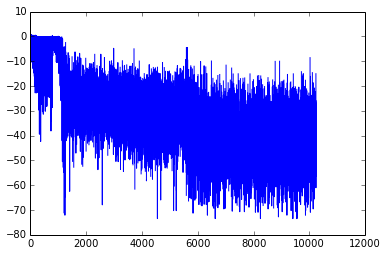

In [387]:
#プロトタイプ 1層
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
from scipy.special import *
I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0  ],[0,0,1  ],[0,1,0  ],[0,1,1  ],[1,0,0  ]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
WU = normal(size=(4,3))
WS = ones(shape(WU))
BU = normal(size=(4,1))
BS = ones(shape(BU))

eps = 0.1
err = []
epoch = 5 * ( 2 ** 11 )
for k in range(epoch):
    X = I[ k % 5 ]
    Y = O[ k % 5 ]
    
    W = normal(size=shape(WU))*WS+WU
    B = normal(size=shape(BU))*BS+BU
    
    V = dot(W, X) + B
    
    VU = dot(WU,    X   ) + BU
    VV = dot(WS**2, X**2) + BS ** 2
    VS = sqrt(VV)
    
    H = 0 < V
    F = 0.5 + 0.5 * erf(- V/VS/sqrt(2))
    P = 0.5 + 0.5 * erf(-VU/VS/sqrt(2))
    
    E = Y - F
    J = exp(-VU**2/VV)/sqrt(pi)/VS
    G = exp(- V**2/VV)/sqrt(pi)/VS
    D = -G * ((Y)/(F)-(1-Y)/(1-F))
    D[isnan(D)] = 0
    D[isinf(D)] = pi * sign(D[isinf(D)])
    WU = WU + eps * (D).dot(X.T)
    BU = BU + eps * (D)
    WS = abs(WS - eps * (WS) * ((D*VU/VV).dot(X.T**2)))
    BS = abs(BS - eps * (BS) * ((D*VU/VV)))
    
    err.append(dot(E.T, E)[0])

display(WS,BS)
for k in range(5):
    X = I[k]
    VU = dot(WU,    X   )+BU
    VV = dot(WS**2, X**2)+BS**2
    VS = sqrt(VV)
    F = 0.5 + 0.5 * erf(-VU/VS/sqrt(2))
    display(F.T)

plot(log(err))

/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in divide
/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in divide
/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in multiply
/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in divide
/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in multiply
/Users/Kota/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


array([[ 0.,  0.,  0.,  0.]])

array([[  1.00000000e+00,   0.00000000e+00,   6.35214104e-13,
          1.00000000e+00]])

array([[ 0.,  0.,  0.,  1.]])

array([[  1.00000000e+00,   1.22124533e-14,   0.00000000e+00,
          1.00000000e+00]])

array([[ 0.,  0.,  1.,  0.]])

array([[  1.00000000e+00,   1.02146069e-12,   4.76039852e-01,
          1.00000000e+00]])

array([[ 0.,  0.,  1.,  1.]])

array([[  1.00000000e+00,   9.92121392e-01,   5.99520433e-15,
          1.00000000e+00]])

array([[ 0.,  1.,  0.,  0.]])

array([[ 1.,  0.,  0.,  1.]])

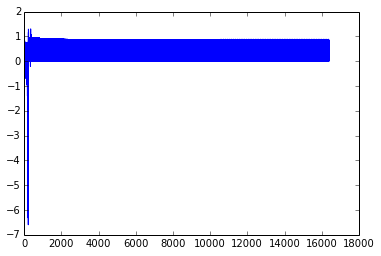

In [718]:
#角層クロスエントロピー
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v],dtype='float64')),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
HB=normal(0, 0.1, (4, 1))
HW=normal(0, 0.1, (4, 4))
OB=normal(0, 0.1, (4, 1))
OW=normal(0, 0.1, (4, 4))

eps = 0.001
k = 0
r = 8
err = []
for idx in range(2**14):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))# > uniform(0, 1, (16, 1))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))# > uniform(0, 1, (4, 1))

    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    E = Ok - OO
    C = (Ok)/(OO) - (1-Ok)/(1-OO)
    DB = r * ( 1 - OO * OO ) * C
    DB[isnan(DB)] = 0
    DB[isinf(DB)] = sign(DB[isinf(DB)])
    DX = 0.5 + 0.5 * tanh(r * dot(inv(OW), Ok))
    
    DW = dot(DB, transpose(HO))
    OW = OW + eps * DW
    OB = OB + eps * DB

    #H update
    E = DX - HO
    C = (DX)/(HO) - (1-DX)/(1-HO)
    DB = r * ( 1 - HO * HO ) * C
    DB[isnan(DB)] = 0
    DB[isinf(DB)] = sign(DB[isinf(DB)])
    DX = dot(transpose(HW), DB)
    
    DW = dot(DB, transpose(Ik))
    HW = HW + eps * DW
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)

plot(log(err))

0

array([[0, 0, 0, 0]])

array([[ 1.,  1.,  1.,  1.]])

1

array([[0, 0, 0, 1]])

array([[ 1.,  1.,  1.,  1.]])

2

array([[0, 0, 1, 0]])

array([[ 1.,  1.,  1.,  1.]])

3

array([[0, 0, 1, 1]])

array([[ 1.,  1.,  1.,  1.]])

4

array([[0, 1, 0, 0]])

array([[ 1.,  1.,  1.,  1.]])

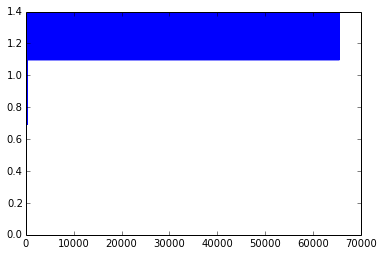

In [46]:
#角層最急降下法
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
HB=normal(0, 1, (16, 1))
HW=normal(0, 1, (16, 4))
OB=normal(0, 1, (4,  1))
OW=normal(0, 1, (4, 16))

eps = 0.05
k = 0
r = 8
err = []
for idx in range(2**16):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))# > uniform(0, 1, (16, 1))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))# > uniform(0, 1, (4, 1))

    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    DB = r * ( 1 - OO * OO ) * ( Ok - OO )
    DX = dot(transpose(OW), Ok)
    
    OW = OW + eps * dot(DB, transpose(HO))
    OB = OB + eps * DB

    #H update
    DB = r * ( 1 - HO * HO ) * ( DX - HO )
    DX = dot(transpose(HW), DB)
    
    DW = dot(DB, transpose(Ik))
    HW = HW + eps * DW
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)

plot(log(err))

0

array([[0, 0, 0, 0]])

array([[  3.86025784e-09,   0.00000000e+00,   3.17650951e-08,
          2.58843008e-09]])

1

array([[0, 0, 0, 1]])

array([[  1.39200062e-06,   2.17866038e-04,   0.00000000e+00,
          9.83591835e-01]])

2

array([[0, 0, 1, 0]])

array([[  2.54796184e-14,   2.90286239e-10,   9.99996296e-01,
          0.00000000e+00]])

3

array([[0, 0, 1, 1]])

array([[  1.16173583e-05,   9.88799466e-01,   1.87627691e-14,
          4.62872728e-04]])

4

array([[0, 1, 0, 0]])

array([[  9.96414485e-01,   3.49154039e-12,   6.83682873e-08,
          4.48720050e-09]])

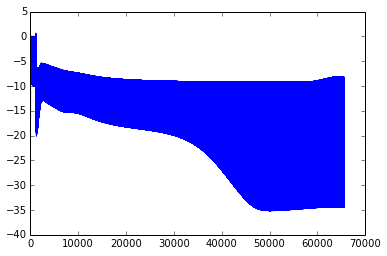

In [257]:
#ただの最急降下法
%matplotlib inline
from IPython.display import display
from matplotlib.pylab import *
I=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0]])
O=map(lambda v:transpose(array([v])),[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
HB=normal(0, 1, (16, 1))
HW=normal(0, 1, (16, 4))
OB=normal(0, 1, (4,  1))
OW=normal(0, 1, (4, 16))

eps = 0.01
k = 0
r = 8
err = []
for idx in range(2**16):
    k = idx % 5
    Ik = I[k]
    Ok = O[k]
    HO = (0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB)))# > uniform(0, 1, (16, 1))
    OO = (0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB)))# > uniform(0, 1, (4, 1))

    DX = Ok - OO
    E = Ok - OO
    err.append(E.T.dot(E)[0])

    #O update
    DB = DX * r * (1 - OO * OO)
    DX = dot(transpose(OW), DB)
    
    OW = OW + eps * dot(DB, transpose(HO))
    OB = OB + eps * DB

    #H update
    DB = DX * r * (1 - HO * HO)
    DX = dot(transpose(HW), DB)
    
    DW = dot(DB, transpose(Ik))
    HW = HW + eps * DW
    HB = HB + eps * DB

for k in range(5):
    Ik = I[k]
    Ok = O[k]
    HO = 0.5 + 0.5 * tanh(r*(dot(HW, Ik)+HB))
    OO = 0.5 + 0.5 * tanh(r*(dot(OW, HO)+OB))
    display(k, Ik.T, OO.T)
    
plot(log(err))

In [333]:
A = array([1.0,2.0,3.0])
B = array([1,1,0])
M = array([True, True, False])
display(A[M]/B[M])

array([ 1.,  2.])